### Calling and writing our own functions

In [1]:
def square(x):
    y = x * x   
    return y

print(square(5))

25


### Function input

In [4]:
# my first function

# function header
def my_function(param_1, param_2 = 0):
        # function body
        som = param_1 + param_2
        product = param_1 * param_2
        
        # function output
        return som, product

In [ ]:
# function call with explicit parameter names
my_function(param_1 = 1, param_2 = 2)

(3, 2)

In [ ]:
# function call with positional arguments
my_function(1, 2)

In [ ]:
#function call using default param_2 value
my_function(param_1 = 1)

(1, 0)

In [2]:
# Error, missing param_1
my_function(param_2 = 2)

NameError: name 'my_function' is not defined

### Function output

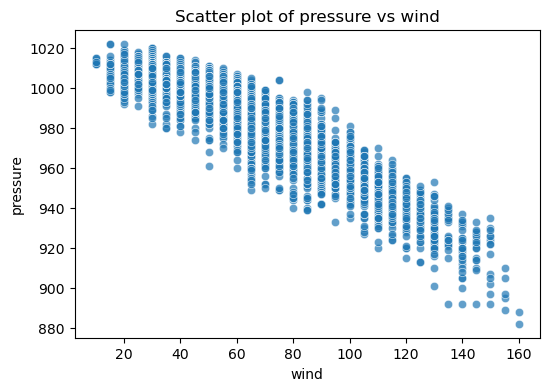

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
storms = pd.read_csv("storms.csv")

# If no output is needed, just do not set the return-value in the function can be set to NULL or equal to the input
def create_plot(dataframe, x_col, y_col):
    """Create a scatter plot from two DataFrame columns using seaborn."""
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=dataframe, x=x_col, y=y_col, alpha=0.7)
    plt.title(f"Scatter plot of {y_col} vs {x_col}")
    plt.show()
    return None  # or simply omit this line

create_plot(storms, 'wind', 'pressure')

In [5]:
# Thi s function returns two values, which we can capture in two variables
s, p = my_function(param_1 = 1, param_2 = 2)

In [12]:
p

2

## Function scopes

In [41]:
import pandas as pd

# object years in global scope
years = 3

def create_dataframe(row_name = "age"):

    # years is in local scope, if we remove this line, it will take the value from global scope
    years = 9
    months = years * 12


    d = {'type': row_name, 'age': years, 'months': months}
    data = pd.DataFrame(data = d, index = [0])
    
    return data

# here we see years is 9 from the local scope
create_dataframe()

,type,age,months
0,age,9,108


In [44]:
# years equals what it is in global scope 
years

# months # only exists in local scope

3

# Reusability

In [48]:
# read flights data
flights = pd.read_csv('flights.csv')

In [49]:
# copy-paste code
flights_month = (flights
                .groupby('month')
                .agg(mean_arr_delay = ('arr_delay', 'mean'))
                )
flights_carrier = (flights
                .groupby('carrier')
                .agg(mean_arr_delay = ('arr_delay', 'mean'))
                  )
flights_origin = (flights
                .groupby('origin')
                .agg(mean_arr_delay = ('arr_delay', 'mean'))
                 )
flights_dest = (flights
                .groupby('dest')
                .agg(mean_arr_delay = ('arr_delay', 'mean'))
               )

In [ ]:
# reusable function overcoming copy-pasting
def get_delay_by(grouping_var):
    output = (flights
              .groupby(grouping_var)
              .agg(mean_arr_delay = ('arr_delay', 'mean'))
             )
    
    return output

In [ ]:
get_delay_by('month')
get_delay_by('carrier')
get_delay_by('origin')
get_delay_by('dest')

In [ ]:
# easy to update
def get_delay_by(grouping_var):
    output = (flights
              .groupby(grouping_var)
              .agg(mean_arr_delay = ('arr_delay', 'mean'),
                  median_arr_delay = ('arr_delay', 'median'))
             )
    
    return output

## Lambdas

What is a lambda function?
1. A small, anonymous function written in a single line.
2. For short, simple functions that you don’t need to reuse.
3. Useful for when you want a custom calculation that isn’t available as a built-in function.


Syntax: lambda arguments: expression


In [55]:
import numpy as np
# Group the flights dataset by 'carrier' (airline)
avg_positive_delay = (
    flights.groupby('carrier')  # Group rows by airline code
    .agg(
        # For each group, compute the mean of arr_delay values > 0
        avg_positive_delay=('arr_delay', lambda x: np.mean(x[x > 0]))
        # 'x' here is the series of 'arr_delay' values for that group
        # x[x > 0] filters only the positive delays
        # np.mean computes the average of those positive delays
    )
)


print(avg_positive_delay)

         avg_positive_delay
carrier                    
9E                49.272714
AA                38.265552
AS                34.365079
B6                40.009064
DL                37.743557
EV                48.268584
F9                47.579082
FL                41.094459
HA                35.030928
MQ                37.852048
OO                60.600000
UA                36.650977
US                29.011566
VX                43.847079
WN                40.747549
YV                51.081395


Lambda can be used for quick calculations. However you can also define a function and use it instead.

In [59]:
# Define a custom function
def mean_positive(values):
    """Return the mean of only positive numbers in a series."""
    return np.mean(values[values > 0])

# Use the custom function with groupby and agg
avg_positive_delay = (
    flights.groupby('carrier')
    .agg(avg_positive_delay=('arr_delay', mean_positive))  # pass the function directly, no parameter needed Pandas will call it for each group, automatically passing the grouped Series as the argument.
    .reset_index() # optional, to turn the index back into a column
)

print(avg_positive_delay)

   carrier  avg_positive_delay
0       9E           49.272714
1       AA           38.265552
2       AS           34.365079
3       B6           40.009064
4       DL           37.743557
5       EV           48.268584
6       F9           47.579082
7       FL           41.094459
8       HA           35.030928
9       MQ           37.852048
10      OO           60.600000
11      UA           36.650977
12      US           29.011566
13      VX           43.847079
14      WN           40.747549
15      YV           51.081395
